In [1]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from tensorflow.keras.utils import to_categorical
from multiprocessing import Pool
import itertools
import time
import gc
import tensorflow.keras.backend as K
import csv
import os

C:\Users\user\anaconda3\envs\snn_env_gpu\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


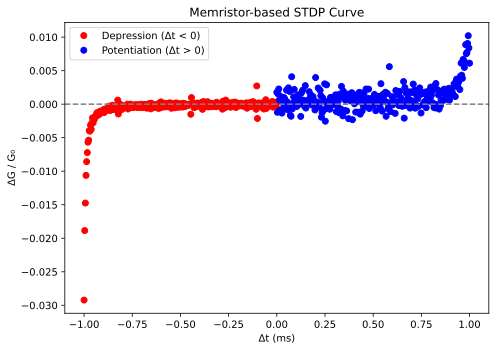

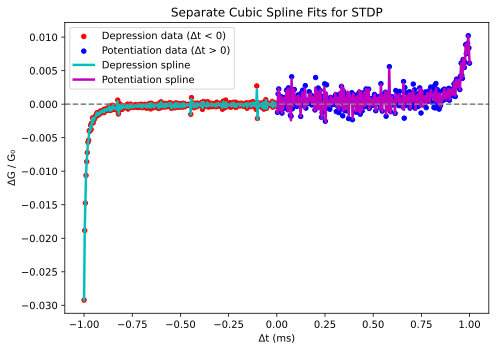

In [2]:
%run SADP_functions.ipynb

In [3]:
# --- CONFIGURATION ---
dataset_name = "mnist"
rate_codings = {
    'rate': rate_coding,
    'ttfs': ttfs_coding
}
label_codings = {
    'rate': rate_code_labels,
    'ttfs': ttfs_code_labels
}
timesteps_list = [10]

def build_model_1layer(ts):
    return build_snn_1layer(num_timesteps=ts)

def build_model_2layer(ts):
    return build_snn_2layer(num_timesteps=ts)

def build_model_1layer_small(ts):
    return build_snn_1layer_small(num_timesteps=ts)

def build_model_2layer_small(ts):
    return build_snn_2layer_small(num_timesteps=ts)

model_builders = {
    '1layer': build_model_1layer,
    '1layer small': build_model_1layer
    #'2layer': build_model_2layer_small
}
sadp_methods = {
    'linear': train_on_chip_linear,
    'spline': train_on_chip_spline
}

In [4]:
# --- LOAD DATA ---
if dataset_name == "mnist":
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
else:
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [5]:
csv_file = "snn_benchmarking_experiment_results.csv"
write_header = not os.path.exists(csv_file)

with open(csv_file, mode='a', newline='') as f:
    writer = csv.DictWriter(f, fieldnames=[
        'Model', 'Coding', 'Timesteps', 'Classifier',
        'Accuracy', 'F1', 'Runtime_sec'
    ])
    if write_header:
        writer.writeheader()


=== Running linear | rate | 10 ts | 1layer ===

Epoch 1/10


Epoch 1: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [12:11<00:00,  1.28it/s]


  Avg Output Spikes: 0.7507
  Final Layer Weight Norm: 343.7901

Epoch 2/10


Epoch 2: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [12:05<00:00,  1.29it/s]


  Avg Output Spikes: 0.7472
  Final Layer Weight Norm: 358.5026

Epoch 3/10


Epoch 3: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [12:05<00:00,  1.29it/s]


  Avg Output Spikes: 0.7478
  Final Layer Weight Norm: 369.7573

Epoch 4/10


Epoch 4: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [12:02<00:00,  1.30it/s]


  Avg Output Spikes: 0.7425
  Final Layer Weight Norm: 378.8040

Epoch 5/10


Epoch 5: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [12:04<00:00,  1.29it/s]


  Avg Output Spikes: 0.7430
  Final Layer Weight Norm: 386.2457

Epoch 6/10


Epoch 6: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [12:05<00:00,  1.29it/s]


  Avg Output Spikes: 0.7409
  Final Layer Weight Norm: 392.4871

Epoch 7/10


Epoch 7: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [12:07<00:00,  1.29it/s]


  Avg Output Spikes: 0.7430
  Final Layer Weight Norm: 397.7975

Epoch 8/10


Epoch 8: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [12:04<00:00,  1.29it/s]


  Avg Output Spikes: 0.7449
  Final Layer Weight Norm: 402.3529

Epoch 9/10


Epoch 9: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [12:06<00:00,  1.29it/s]


  Avg Output Spikes: 0.7438
  Final Layer Weight Norm: 406.3091

Epoch 10/10


Epoch 10: 100%|██████████████████████████████████████████████████████████████████████| 937/937 [12:06<00:00,  1.29it/s]


  Avg Output Spikes: 0.7463
  Final Layer Weight Norm: 409.7802

⚙️  Processing model: frozen
Epoch 1/50
844/844 [==============================] - 14s 15ms/step - loss: 1.2993 - accuracy: 0.6342 - val_loss: 0.7369 - val_accuracy: 0.8305
Epoch 2/50
844/844 [==============================] - 12s 14ms/step - loss: 0.6857 - accuracy: 0.8143 - val_loss: 0.5156 - val_accuracy: 0.8695
Epoch 3/50
844/844 [==============================] - 12s 14ms/step - loss: 0.5429 - accuracy: 0.8470 - val_loss: 0.4329 - val_accuracy: 0.8840
Epoch 4/50
844/844 [==============================] - 12s 14ms/step - loss: 0.4762 - accuracy: 0.8626 - val_loss: 0.3920 - val_accuracy: 0.8912
Epoch 5/50
844/844 [==============================] - 12s 14ms/step - loss: 0.4344 - accuracy: 0.8731 - val_loss: 0.3569 - val_accuracy: 0.8983
Epoch 6/50
844/844 [==============================] - 12s 14ms/step - loss: 0.4057 - accuracy: 0.8816 - val_loss: 0.3419 - val_accuracy: 0.8992
Epoch 7/50
844/844 [======================

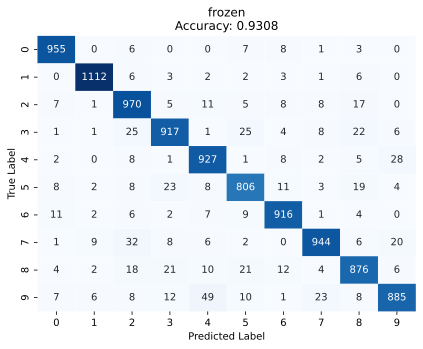


=== Running linear | rate | 10 ts | 1layer small ===

Epoch 1/10


Epoch 1: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [12:00<00:00,  1.30it/s]


  Avg Output Spikes: 0.7367
  Final Layer Weight Norm: 343.5732

Epoch 2/10


Epoch 2: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [12:01<00:00,  1.30it/s]


  Avg Output Spikes: 0.7428
  Final Layer Weight Norm: 358.0487

Epoch 3/10


Epoch 3: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [12:02<00:00,  1.30it/s]


  Avg Output Spikes: 0.7470
  Final Layer Weight Norm: 369.2113

Epoch 4/10


Epoch 4: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [12:01<00:00,  1.30it/s]


  Avg Output Spikes: 0.7474
  Final Layer Weight Norm: 378.1405

Epoch 5/10


Epoch 5: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [12:00<00:00,  1.30it/s]


  Avg Output Spikes: 0.7492
  Final Layer Weight Norm: 385.5092

Epoch 6/10


Epoch 6: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [11:59<00:00,  1.30it/s]


  Avg Output Spikes: 0.7542
  Final Layer Weight Norm: 391.7196

Epoch 7/10


Epoch 7: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [11:58<00:00,  1.30it/s]


  Avg Output Spikes: 0.7545
  Final Layer Weight Norm: 396.9989

Epoch 8/10


Epoch 8: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [11:59<00:00,  1.30it/s]


  Avg Output Spikes: 0.7498
  Final Layer Weight Norm: 401.5628

Epoch 9/10


Epoch 9: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [11:58<00:00,  1.30it/s]


  Avg Output Spikes: 0.7439
  Final Layer Weight Norm: 405.5303

Epoch 10/10


Epoch 10: 100%|██████████████████████████████████████████████████████████████████████| 937/937 [11:59<00:00,  1.30it/s]


  Avg Output Spikes: 0.7513
  Final Layer Weight Norm: 408.9684

⚙️  Processing model: frozen
Epoch 1/50
844/844 [==============================] - 13s 15ms/step - loss: 1.2763 - accuracy: 0.6541 - val_loss: 0.7340 - val_accuracy: 0.8347
Epoch 2/50
844/844 [==============================] - 12s 14ms/step - loss: 0.6779 - accuracy: 0.8237 - val_loss: 0.5139 - val_accuracy: 0.8710
Epoch 3/50
844/844 [==============================] - 12s 14ms/step - loss: 0.5432 - accuracy: 0.8508 - val_loss: 0.4338 - val_accuracy: 0.8890
Epoch 4/50
844/844 [==============================] - 12s 14ms/step - loss: 0.4788 - accuracy: 0.8645 - val_loss: 0.3902 - val_accuracy: 0.8937
Epoch 5/50
844/844 [==============================] - 12s 14ms/step - loss: 0.4391 - accuracy: 0.8745 - val_loss: 0.3669 - val_accuracy: 0.8970
Epoch 6/50
844/844 [==============================] - 11s 13ms/step - loss: 0.4110 - accuracy: 0.8817 - val_loss: 0.3368 - val_accuracy: 0.9057
Epoch 7/50
844/844 [======================

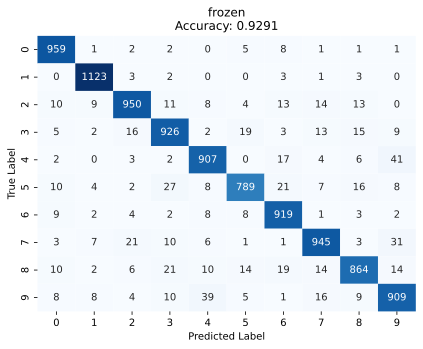


=== Running linear | ttfs | 10 ts | 1layer ===

Epoch 1/10


Epoch 1: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [12:03<00:00,  1.29it/s]


  Avg Output Spikes: 0.3523
  Final Layer Weight Norm: 402.7812

Epoch 2/10


Epoch 2: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [12:02<00:00,  1.30it/s]


  Avg Output Spikes: 0.2957
  Final Layer Weight Norm: 432.0645

Epoch 3/10


Epoch 3: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [12:02<00:00,  1.30it/s]


  Avg Output Spikes: 0.2938
  Final Layer Weight Norm: 441.8402

Epoch 4/10


Epoch 4: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [12:04<00:00,  1.29it/s]


  Avg Output Spikes: 0.2946
  Final Layer Weight Norm: 444.1992

Epoch 5/10


Epoch 5: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [12:04<00:00,  1.29it/s]


  Avg Output Spikes: 0.2983
  Final Layer Weight Norm: 445.9558

Epoch 6/10


Epoch 6: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [12:03<00:00,  1.30it/s]


  Avg Output Spikes: 0.2962
  Final Layer Weight Norm: 446.9261

Epoch 7/10


Epoch 7: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [12:05<00:00,  1.29it/s]


  Avg Output Spikes: 0.2993
  Final Layer Weight Norm: 447.3636

Epoch 8/10


Epoch 8: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [12:03<00:00,  1.29it/s]


  Avg Output Spikes: 0.3014
  Final Layer Weight Norm: 447.6855

Epoch 9/10


Epoch 9: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [12:03<00:00,  1.30it/s]


  Avg Output Spikes: 0.2953
  Final Layer Weight Norm: 448.9054

Epoch 10/10


Epoch 10: 100%|██████████████████████████████████████████████████████████████████████| 937/937 [12:03<00:00,  1.30it/s]


  Avg Output Spikes: 0.3005
  Final Layer Weight Norm: 449.1127

⚙️  Processing model: frozen
Epoch 1/50
844/844 [==============================] - 13s 15ms/step - loss: 2.0339 - accuracy: 0.2898 - val_loss: 1.8594 - val_accuracy: 0.3353
Epoch 2/50
844/844 [==============================] - 12s 14ms/step - loss: 1.8230 - accuracy: 0.3552 - val_loss: 1.7379 - val_accuracy: 0.3982
Epoch 3/50
844/844 [==============================] - 12s 14ms/step - loss: 1.7352 - accuracy: 0.3948 - val_loss: 1.6639 - val_accuracy: 0.4437
Epoch 4/50
844/844 [==============================] - 12s 14ms/step - loss: 1.6787 - accuracy: 0.4106 - val_loss: 1.6084 - val_accuracy: 0.4598
Epoch 5/50
844/844 [==============================] - 12s 14ms/step - loss: 1.6363 - accuracy: 0.4319 - val_loss: 1.5719 - val_accuracy: 0.4727
Epoch 6/50
844/844 [==============================] - 12s 14ms/step - loss: 1.6013 - accuracy: 0.4444 - val_loss: 1.5379 - val_accuracy: 0.4765
Epoch 7/50
844/844 [======================

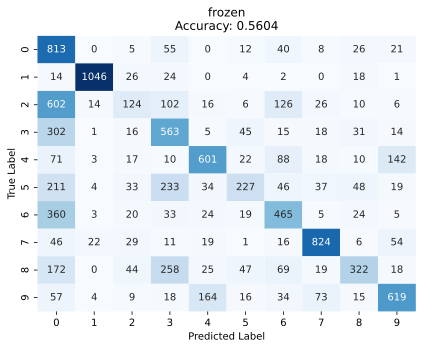


=== Running linear | ttfs | 10 ts | 1layer small ===

Epoch 1/10


Epoch 1: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [12:07<00:00,  1.29it/s]


  Avg Output Spikes: 0.4650
  Final Layer Weight Norm: 405.4987

Epoch 2/10


Epoch 2: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [12:07<00:00,  1.29it/s]


  Avg Output Spikes: 0.4515
  Final Layer Weight Norm: 426.1699

Epoch 3/10


Epoch 3: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [12:06<00:00,  1.29it/s]


  Avg Output Spikes: 0.4479
  Final Layer Weight Norm: 429.5657

Epoch 4/10


Epoch 4: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [12:07<00:00,  1.29it/s]


  Avg Output Spikes: 0.4481
  Final Layer Weight Norm: 430.9026

Epoch 5/10


Epoch 5: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [12:07<00:00,  1.29it/s]


  Avg Output Spikes: 0.4451
  Final Layer Weight Norm: 431.6982

Epoch 6/10


Epoch 6: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [12:07<00:00,  1.29it/s]


  Avg Output Spikes: 0.4507
  Final Layer Weight Norm: 432.2331

Epoch 7/10


Epoch 7: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [12:06<00:00,  1.29it/s]


  Avg Output Spikes: 0.4458
  Final Layer Weight Norm: 432.6338

Epoch 8/10


Epoch 8: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [12:08<00:00,  1.29it/s]


  Avg Output Spikes: 0.4517
  Final Layer Weight Norm: 432.9402

Epoch 9/10


Epoch 9: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [12:07<00:00,  1.29it/s]


  Avg Output Spikes: 0.4435
  Final Layer Weight Norm: 433.1830

Epoch 10/10


Epoch 10: 100%|██████████████████████████████████████████████████████████████████████| 937/937 [12:07<00:00,  1.29it/s]


  Avg Output Spikes: 0.4477
  Final Layer Weight Norm: 433.3895

⚙️  Processing model: frozen
Epoch 1/50
844/844 [==============================] - 14s 16ms/step - loss: 2.0497 - accuracy: 0.2721 - val_loss: 1.9042 - val_accuracy: 0.3318
Epoch 2/50
844/844 [==============================] - 12s 14ms/step - loss: 1.8692 - accuracy: 0.3161 - val_loss: 1.7900 - val_accuracy: 0.3372
Epoch 3/50
844/844 [==============================] - 12s 14ms/step - loss: 1.7962 - accuracy: 0.3337 - val_loss: 1.7305 - val_accuracy: 0.3597
Epoch 4/50
844/844 [==============================] - 12s 14ms/step - loss: 1.7531 - accuracy: 0.3484 - val_loss: 1.6919 - val_accuracy: 0.3745
Epoch 5/50
844/844 [==============================] - 12s 14ms/step - loss: 1.7222 - accuracy: 0.3555 - val_loss: 1.6751 - val_accuracy: 0.3670
Epoch 6/50
844/844 [==============================] - 12s 14ms/step - loss: 1.6985 - accuracy: 0.3688 - val_loss: 1.6421 - val_accuracy: 0.4063
Epoch 7/50
844/844 [======================

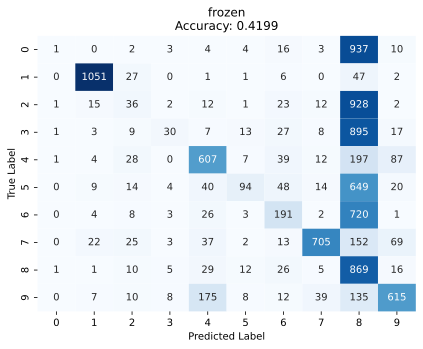


=== Running spline | rate | 10 ts | 1layer ===

Epoch 1/10


Epoch 1: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [12:54<00:00,  1.21it/s]


  Avg Output Spikes: 0.5514
  Final Layer Weight Norm: 332.4725

Epoch 2/10


Epoch 2: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [12:58<00:00,  1.20it/s]


  Avg Output Spikes: 0.4788
  Final Layer Weight Norm: 352.7922

Epoch 3/10


Epoch 3: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [12:44<00:00,  1.23it/s]


  Avg Output Spikes: 0.4707
  Final Layer Weight Norm: 375.1521

Epoch 4/10


Epoch 4: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [12:44<00:00,  1.23it/s]


  Avg Output Spikes: 0.4690
  Final Layer Weight Norm: 391.5406

Epoch 5/10


Epoch 5: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [12:43<00:00,  1.23it/s]


  Avg Output Spikes: 0.4445
  Final Layer Weight Norm: 395.8884

Epoch 6/10


Epoch 6: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [12:45<00:00,  1.22it/s]


  Avg Output Spikes: 0.4566
  Final Layer Weight Norm: 395.8884

Epoch 7/10


Epoch 7: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [12:42<00:00,  1.23it/s]


  Avg Output Spikes: 0.4532
  Final Layer Weight Norm: 395.8884

Epoch 8/10


Epoch 8: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [12:48<00:00,  1.22it/s]


  Avg Output Spikes: 0.4450
  Final Layer Weight Norm: 395.8884

Epoch 9/10


Epoch 9: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [12:44<00:00,  1.22it/s]


  Avg Output Spikes: 0.4495
  Final Layer Weight Norm: 395.8884

Epoch 10/10


Epoch 10: 100%|██████████████████████████████████████████████████████████████████████| 937/937 [12:47<00:00,  1.22it/s]


  Avg Output Spikes: 0.4664
  Final Layer Weight Norm: 395.8884

⚙️  Processing model: frozen
Epoch 1/50
844/844 [==============================] - 14s 16ms/step - loss: 1.0798 - accuracy: 0.6848 - val_loss: 0.5766 - val_accuracy: 0.8457
Epoch 2/50
844/844 [==============================] - 12s 15ms/step - loss: 0.5742 - accuracy: 0.8311 - val_loss: 0.4499 - val_accuracy: 0.8723
Epoch 3/50
844/844 [==============================] - 12s 15ms/step - loss: 0.4918 - accuracy: 0.8506 - val_loss: 0.4078 - val_accuracy: 0.8823
Epoch 4/50
844/844 [==============================] - 12s 15ms/step - loss: 0.4501 - accuracy: 0.8635 - val_loss: 0.3763 - val_accuracy: 0.8925
Epoch 5/50
844/844 [==============================] - 12s 15ms/step - loss: 0.4228 - accuracy: 0.8726 - val_loss: 0.3569 - val_accuracy: 0.8965
Epoch 6/50
844/844 [==============================] - 12s 15ms/step - loss: 0.4021 - accuracy: 0.8780 - val_loss: 0.3484 - val_accuracy: 0.8987
Epoch 7/50
844/844 [======================

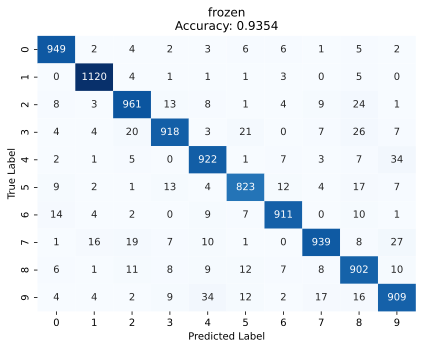


=== Running spline | rate | 10 ts | 1layer small ===

Epoch 1/10


Epoch 1: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [12:44<00:00,  1.23it/s]


  Avg Output Spikes: 0.5547
  Final Layer Weight Norm: 332.2656

Epoch 2/10


Epoch 2: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [12:46<00:00,  1.22it/s]


  Avg Output Spikes: 0.4897
  Final Layer Weight Norm: 352.8699

Epoch 3/10


Epoch 3: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [12:44<00:00,  1.23it/s]


  Avg Output Spikes: 0.4904
  Final Layer Weight Norm: 375.4615

Epoch 4/10


Epoch 4: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [12:45<00:00,  1.22it/s]


  Avg Output Spikes: 0.4655
  Final Layer Weight Norm: 391.9809

Epoch 5/10


Epoch 5: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [12:42<00:00,  1.23it/s]


  Avg Output Spikes: 0.4668
  Final Layer Weight Norm: 396.3175

Epoch 6/10


Epoch 6: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [12:46<00:00,  1.22it/s]


  Avg Output Spikes: 0.4707
  Final Layer Weight Norm: 396.3175

Epoch 7/10


Epoch 7: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [12:45<00:00,  1.22it/s]


  Avg Output Spikes: 0.4594
  Final Layer Weight Norm: 396.3175

Epoch 8/10


Epoch 8: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [12:44<00:00,  1.23it/s]


  Avg Output Spikes: 0.4612
  Final Layer Weight Norm: 396.3175

Epoch 9/10


Epoch 9: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [12:45<00:00,  1.22it/s]


  Avg Output Spikes: 0.4699
  Final Layer Weight Norm: 396.3175

Epoch 10/10


Epoch 10: 100%|██████████████████████████████████████████████████████████████████████| 937/937 [12:44<00:00,  1.23it/s]


  Avg Output Spikes: 0.4528
  Final Layer Weight Norm: 396.3175

⚙️  Processing model: frozen
Epoch 1/50
844/844 [==============================] - 13s 15ms/step - loss: 1.0982 - accuracy: 0.6782 - val_loss: 0.5837 - val_accuracy: 0.8423
Epoch 2/50
844/844 [==============================] - 12s 14ms/step - loss: 0.5851 - accuracy: 0.8281 - val_loss: 0.4565 - val_accuracy: 0.8675
Epoch 3/50
844/844 [==============================] - 12s 14ms/step - loss: 0.5018 - accuracy: 0.8490 - val_loss: 0.4130 - val_accuracy: 0.8798
Epoch 4/50
844/844 [==============================] - 12s 14ms/step - loss: 0.4601 - accuracy: 0.8609 - val_loss: 0.3852 - val_accuracy: 0.8860
Epoch 5/50
844/844 [==============================] - 12s 14ms/step - loss: 0.4318 - accuracy: 0.8680 - val_loss: 0.3670 - val_accuracy: 0.8903
Epoch 6/50
844/844 [==============================] - 11s 14ms/step - loss: 0.4099 - accuracy: 0.8747 - val_loss: 0.3532 - val_accuracy: 0.8905
Epoch 7/50
844/844 [======================

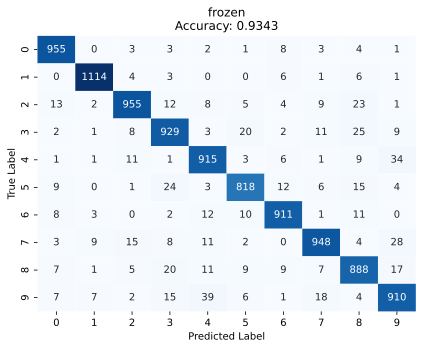


=== Running spline | ttfs | 10 ts | 1layer ===

Epoch 1/10


Epoch 1: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [12:45<00:00,  1.22it/s]


  Avg Output Spikes: 0.8201
  Final Layer Weight Norm: 324.4808

Epoch 2/10


Epoch 2: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [12:49<00:00,  1.22it/s]


  Avg Output Spikes: 0.8191
  Final Layer Weight Norm: 329.6437

Epoch 3/10


Epoch 3: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [12:44<00:00,  1.23it/s]


  Avg Output Spikes: 0.7597
  Final Layer Weight Norm: 338.8171

Epoch 4/10


Epoch 4: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [12:42<00:00,  1.23it/s]


  Avg Output Spikes: 0.7401
  Final Layer Weight Norm: 347.6764

Epoch 5/10


Epoch 5: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [12:46<00:00,  1.22it/s]


  Avg Output Spikes: 0.6595
  Final Layer Weight Norm: 352.9346

Epoch 6/10


Epoch 6: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [12:55<00:00,  1.21it/s]


  Avg Output Spikes: 0.5563
  Final Layer Weight Norm: 350.2922

Epoch 7/10


Epoch 7: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [12:59<00:00,  1.20it/s]


  Avg Output Spikes: 0.4977
  Final Layer Weight Norm: 344.0532

Epoch 8/10


Epoch 8: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [12:59<00:00,  1.20it/s]


  Avg Output Spikes: 0.4898
  Final Layer Weight Norm: 341.3399

Epoch 9/10


Epoch 9: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [12:59<00:00,  1.20it/s]


  Avg Output Spikes: 0.5155
  Final Layer Weight Norm: 342.2553

Epoch 10/10


Epoch 10: 100%|██████████████████████████████████████████████████████████████████████| 937/937 [13:17<00:00,  1.17it/s]


  Avg Output Spikes: 0.4997
  Final Layer Weight Norm: 345.6946

⚙️  Processing model: frozen
Epoch 1/50
844/844 [==============================] - 16s 18ms/step - loss: 1.3183 - accuracy: 0.5873 - val_loss: 0.8711 - val_accuracy: 0.7427
Epoch 2/50
844/844 [==============================] - 14s 16ms/step - loss: 0.8320 - accuracy: 0.7498 - val_loss: 0.6700 - val_accuracy: 0.8123
Epoch 3/50
844/844 [==============================] - 13s 16ms/step - loss: 0.6988 - accuracy: 0.7891 - val_loss: 0.5827 - val_accuracy: 0.8368
Epoch 4/50
844/844 [==============================] - 13s 16ms/step - loss: 0.6278 - accuracy: 0.8113 - val_loss: 0.5384 - val_accuracy: 0.8450
Epoch 5/50
844/844 [==============================] - 13s 16ms/step - loss: 0.5824 - accuracy: 0.8258 - val_loss: 0.5032 - val_accuracy: 0.8513
Epoch 6/50
844/844 [==============================] - 13s 16ms/step - loss: 0.5501 - accuracy: 0.8354 - val_loss: 0.4825 - val_accuracy: 0.8547
Epoch 7/50
844/844 [======================

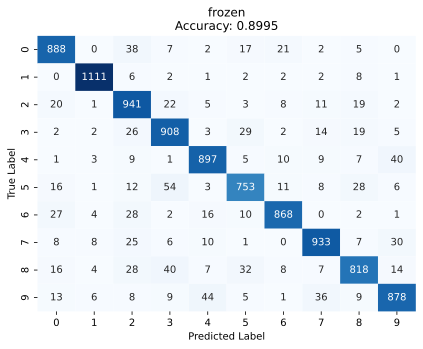


=== Running spline | ttfs | 10 ts | 1layer small ===

Epoch 1/10


Epoch 1: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [13:17<00:00,  1.17it/s]


  Avg Output Spikes: 0.8080
  Final Layer Weight Norm: 324.3364

Epoch 2/10


Epoch 2: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [13:06<00:00,  1.19it/s]


  Avg Output Spikes: 0.8140
  Final Layer Weight Norm: 329.3833

Epoch 3/10


Epoch 3: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [13:11<00:00,  1.18it/s]


  Avg Output Spikes: 0.7751
  Final Layer Weight Norm: 338.9762

Epoch 4/10


Epoch 4: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [13:14<00:00,  1.18it/s]


  Avg Output Spikes: 0.7372
  Final Layer Weight Norm: 348.4353

Epoch 5/10


Epoch 5: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [13:13<00:00,  1.18it/s]


  Avg Output Spikes: 0.6659
  Final Layer Weight Norm: 353.6236

Epoch 6/10


Epoch 6: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [13:16<00:00,  1.18it/s]


  Avg Output Spikes: 0.5847
  Final Layer Weight Norm: 350.1206

Epoch 7/10


Epoch 7: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [13:11<00:00,  1.18it/s]


  Avg Output Spikes: 0.5192
  Final Layer Weight Norm: 344.7705

Epoch 8/10


Epoch 8: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [13:18<00:00,  1.17it/s]


  Avg Output Spikes: 0.5246
  Final Layer Weight Norm: 343.3582

Epoch 9/10


Epoch 9: 100%|███████████████████████████████████████████████████████████████████████| 937/937 [13:18<00:00,  1.17it/s]


  Avg Output Spikes: 0.5293
  Final Layer Weight Norm: 344.9395

Epoch 10/10


Epoch 10: 100%|██████████████████████████████████████████████████████████████████████| 937/937 [13:15<00:00,  1.18it/s]


  Avg Output Spikes: 0.5500
  Final Layer Weight Norm: 348.3956

⚙️  Processing model: frozen
Epoch 1/50
844/844 [==============================] - 17s 19ms/step - loss: 1.2674 - accuracy: 0.6097 - val_loss: 0.8116 - val_accuracy: 0.7903
Epoch 2/50
844/844 [==============================] - 12s 14ms/step - loss: 0.7763 - accuracy: 0.7716 - val_loss: 0.6184 - val_accuracy: 0.8287
Epoch 3/50
844/844 [==============================] - 11s 13ms/step - loss: 0.6514 - accuracy: 0.8084 - val_loss: 0.5401 - val_accuracy: 0.8460
Epoch 4/50
844/844 [==============================] - 12s 14ms/step - loss: 0.5865 - accuracy: 0.8288 - val_loss: 0.5012 - val_accuracy: 0.8555
Epoch 5/50
844/844 [==============================] - 11s 14ms/step - loss: 0.5444 - accuracy: 0.8417 - val_loss: 0.4699 - val_accuracy: 0.8647
Epoch 6/50
844/844 [==============================] - 11s 14ms/step - loss: 0.5143 - accuracy: 0.8494 - val_loss: 0.4423 - val_accuracy: 0.8772
Epoch 7/50
844/844 [======================

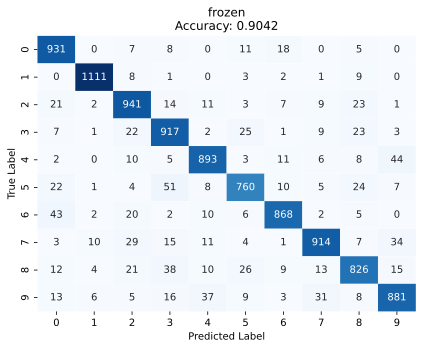

In [6]:
# --- MAIN LOOP ---
all_results = []

for sadp_name, sadp_train_fn in sadp_methods.items():
    for rate_name, rate_fn in rate_codings.items():
        for ts in timesteps_list:
            for model_type, model_fn in model_builders.items():

                config_label = f"{sadp_name} | {rate_name} | {ts} ts | {model_type}"
                print(f"\n=== Running {config_label} ===")

                # Spike encode inputs & labels
                x_train_spike = rate_fn(x_train, ts)
                x_test_spike = rate_fn(x_test, ts)
                y_train_spike = label_codings[rate_name](y_train_cat, ts)
                y_test_spike = label_codings[rate_name](y_test_cat, ts)

                # --- Build and train base SNN ---
                model = model_fn(ts)
                _ = model(tf.convert_to_tensor(x_train_spike[:1]))  # Force build
                
                # --- Measure SADP + classifier time ---
                start_time = time.time()
                
                # SADP training
                if sadp_name == 'spline':
                    w_norms = sadp_train_fn(
                        model, x_train_spike, y_train_spike,
                        spline_pot, spline_dep,
                        epochs=10, batch_size=64, learning_rate=0.1
                    )
                else:
                    w_norms = sadp_train_fn(
                        model, x_train_spike, y_train_spike,
                        epochs=10, batch_size=64, learning_rate=0.1
                    )
                
                # Classifier training
                metrics, history = train_and_evaluate_all(
                    {"frozen": model},
                    x_train_spike, y_train_cat,
                    x_test_spike, y_test_cat,
                    num_timesteps=ts,
                    epochs=50
                )
                
                elapsed_time = time.time() - start_time  # Total runtime
                
                # Evaluation
                acc = metrics["frozen"]["accuracy"]
                f1 = metrics["frozen"]["F1"]
                
                
                # Record all results
                result_entry = {
                    'Model': sadp_name + ' SADP',
                    'Coding': rate_name,
                    'Timesteps': ts,
                    'Classifier': model_type,
                    'Accuracy': acc,
                    'F1': f1,
                    'Runtime_sec': elapsed_time,
                    'W_norms': w_norms,
                    'History': history.history
                }
                
                all_results.append(result_entry)
                
                # Extract only serializable fields for CSV
                csv_row = {
                    'Model': sadp_name + ' SADP',
                    'Coding': rate_name,
                    'Timesteps': ts,
                    'Classifier': model_type,
                    'Accuracy': acc,
                    'F1': f1,
                    'Runtime_sec': elapsed_time
                }
                
                # Append to CSV immediately
                with open(csv_file, mode='a', newline='') as f:
                    writer = csv.DictWriter(f, fieldnames=csv_row.keys())
                    writer.writerow(csv_row)

                # Clear TF session to release memory
                K.clear_session()
                
                # Force garbage collection
                gc.collect()


In [7]:
# --- RESULTS TABLE ---
results_df = pd.DataFrame([
    {k: v for k, v in r.items() if k in ['Model','Coding', 'Classifier','Accuracy','F1', 'Runtime_sec']}
    for r in all_results
])
print("\n\nFinal Benchmark Results:")
print(results_df.to_markdown(index=False))



Final Benchmark Results:
| Model       | Coding   | Classifier   |   Accuracy |       F1 |   Runtime_sec |
|:------------|:---------|:-------------|-----------:|---------:|--------------:|
| linear SADP | rate     | 1layer       |     0.9308 | 0.929923 |       7859.06 |
| linear SADP | rate     | 1layer small |     0.9291 | 0.928051 |       7766.42 |
| linear SADP | ttfs     | 1layer       |     0.5604 | 0.543354 |       7825.4  |
| linear SADP | ttfs     | 1layer small |     0.4199 | 0.385082 |       7852.3  |
| spline SADP | rate     | 1layer       |     0.9354 | 0.934798 |       8302.37 |
| spline SADP | rate     | 1layer small |     0.9343 | 0.933646 |       8246.73 |
| spline SADP | ttfs     | 1layer       |     0.8995 | 0.898105 |       8422.77 |
| spline SADP | ttfs     | 1layer small |     0.9042 | 0.902799 |       8525.23 |


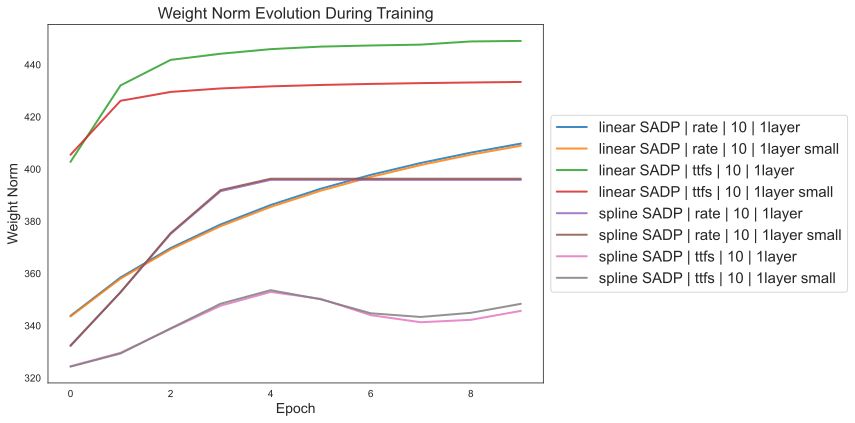

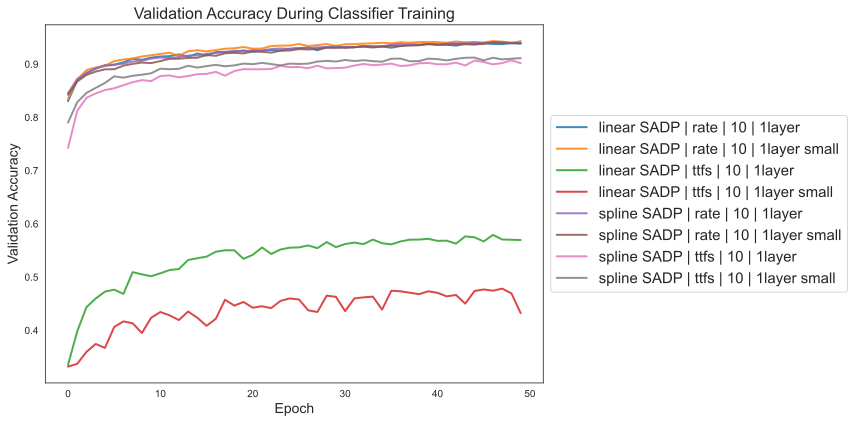

In [8]:
# Use clean style and explicitly disable grid
sns.set_style("white")

# --- Plot 1: Weight Norm Evolution ---
plt.figure(figsize=(12, 6))
for r in all_results:
    label = f"{r['Model']} | {r['Coding']} | {r['Timesteps']} | {r['Classifier']}"
    plt.plot(r['W_norms'], label=label, linewidth=2, alpha=0.85)
plt.title("Weight Norm Evolution During Training", fontsize=16)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Weight Norm", fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=15, frameon=True)
plt.grid(False)  # <-- explicitly disable grid
plt.subplots_adjust(right=0.75)
plt.tight_layout()
plt.savefig("weight_norm_evolution.png", dpi=300, bbox_inches='tight')
plt.show()

# --- Plot 2: Validation Accuracy During Training ---
plt.figure(figsize=(12, 6))
for r in all_results:
    label = f"{r['Model']} | {r['Coding']} | {r['Timesteps']} | {r['Classifier']}"
    plt.plot(r['History']['val_accuracy'], label=label, linewidth=2, alpha=0.85)
plt.title("Validation Accuracy During Classifier Training", fontsize=16)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Validation Accuracy", fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=15, frameon=True)
plt.grid(False)  # <-- explicitly disable grid
plt.subplots_adjust(right=0.75)
plt.tight_layout()
plt.savefig("validation_accuracy_evolution.png", dpi=300, bbox_inches='tight')
plt.show()
